In [2]:
import pandas as pd
from sklearn.preprocessing import scale





In [303]:
data = pd.read_csv('heartdataset.csv')
df = pd.DataFrame(data)
df_norm = (df - df.mean()) / (df.max() - df.min())
n_samples = len(data)
n_samples

269

In [278]:
df.values

array([[ 67.,   0.,   3., ...,   0.,   7.,   1.],
       [ 57.,   1.,   2., ...,   0.,   7.,   2.],
       [ 64.,   1.,   4., ...,   1.,   7.,   1.],
       ..., 
       [ 56.,   0.,   2., ...,   0.,   3.,   1.],
       [ 57.,   1.,   4., ...,   0.,   6.,   1.],
       [ 67.,   1.,   4., ...,   3.,   3.,   2.]])

In [279]:
df_norm.values

array([[ 0.26301115, -0.67657993, -0.05700124, ..., -0.22057001,
         0.57434944, -0.44237918],
       [ 0.05467782,  0.32342007, -0.39033457, ..., -0.22057001,
         0.57434944,  0.55762082],
       [ 0.20051115,  0.32342007,  0.27633209, ...,  0.11276332,
         0.57434944, -0.44237918],
       ..., 
       [ 0.03384449, -0.67657993, -0.39033457, ..., -0.22057001,
        -0.42565056, -0.44237918],
       [ 0.05467782,  0.32342007,  0.27633209, ..., -0.22057001,
         0.32434944, -0.44237918],
       [ 0.26301115,  0.32342007,  0.27633209, ...,  0.77942999,
        -0.42565056,  0.55762082]])

In [53]:
data.tail()

,70,1,4,130,322,0,2,109,0.1,2.4,2.1,3,3.1,2.2
264,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
265,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
266,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
267,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1
268,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2


In [89]:
df[['2.2']].isnull()
df[['2.2']].any()


2.2    True
dtype: bool

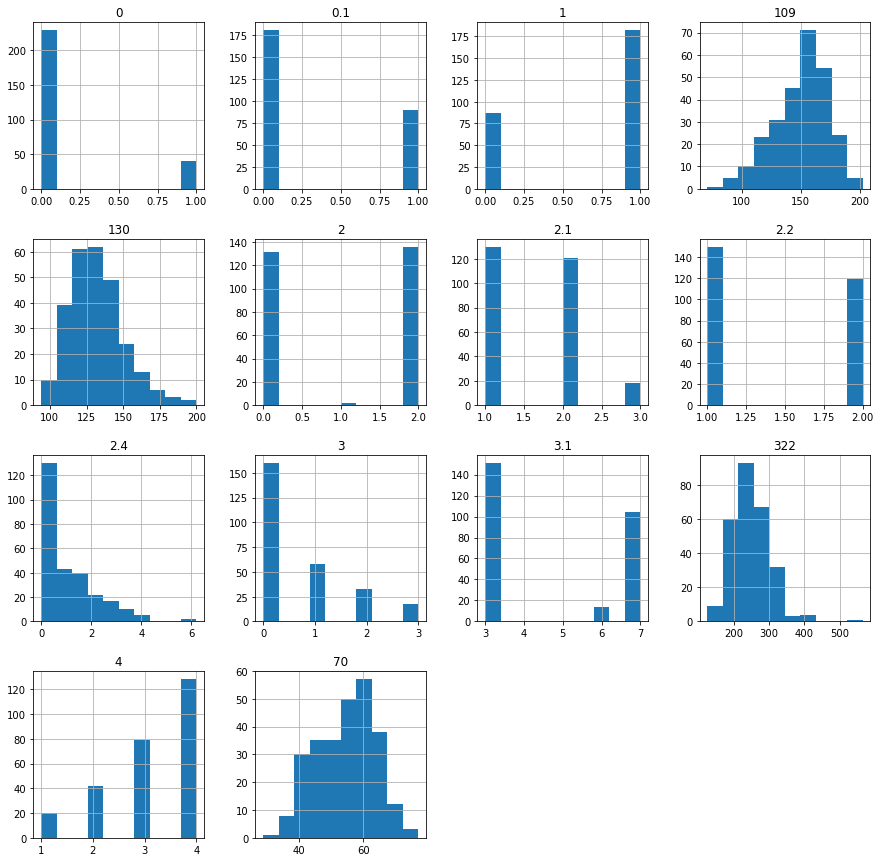

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

pd.DataFrame.hist(data, figsize=[15,15]);

Part 2: Sample Selection
1. For this part of the assignment, you will be using the first 200 samples for training and cross validation and the remainder for testing.
2. Extract the feature columns and target column from the dataset for both training and testing subsets.

Part 3: Building a SVM Classifier
In this part you will build a SVM classifier and train it using this data.
Requirements:
1. Using the training data split train a linear SVM.
2. Using GridSearchCV with 5-folds try different values for C.
3. What is the best performing C value you found?


In [387]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV


In [405]:
import numpy as np
from sklearn.metrics import accuracy_score

trainingX = df[0:201]

testingX = df[202::]


Xtrain = trainingX[['70','1','4','130','322','0','2','109','0.1','2.4','2.1','3','3.1']]
xTR = Xtrain.values
Xtest= testingX[['70','1','4','130','322','0','2','109','0.1','2.4','2.1','3','3.1']]
xTS = Xtest.values
# Extract the feature columns and target column from the dataset for both training and testing subsets.




trainingX = df[0:201].values

testingX = df[202::].values

ytrain = [] 
ytest = [] 
for a in trainingX:
    t = a[13]
    ytrain.append(t)
for a in testingX:
    t = a[13]
    ytest.append(t)
yTS = np.asarray(ytest)
yTR = np.asarray(ytrain)

X_train, X_test, y_train, y_test = train_test_split(trainingX,yTR, test_size=0.2, random_state=0)
parameters =  {'C': [1, 10, 100, 1000]}
estimator = svm.LinearSVC()
clf = GridSearchCV(estimator, parameters, cv=5)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)>

4. How many support vectors does this model use? 


In [389]:
clf.best_estimator_

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [390]:
clf.cv_results_

{'mean_fit_time': array([ 0.01211066,  0.00960751,  0.00910606,  0.00900588]),
 'mean_score_time': array([ 0.0002995 ,  0.00019989,  0.00020027,  0.00020022]),
 'mean_test_score': array([ 0.875  ,  0.84375,  0.78125,  0.83125]),
 'mean_train_score': array([ 0.89228268,  0.85159407,  0.82829248,  0.82033444]),
 'param_C': masked_array(data = [1 10 100 1000],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}),
 'rank_test_score': array([1, 2, 4, 3]),
 'split0_test_score': array([ 0.78787879,  0.75757576,  0.75757576,  0.78787879]),
 'split0_train_score': array([ 0.92913386,  0.80314961,  0.91338583,  0.90551181]),
 'split1_test_score': array([ 0.8125 ,  0.84375,  0.71875,  0.65625]),
 'split1_train_score': array([ 0.8984375,  0.9140625,  0.84375  ,  0.515625 ]),
 'split2_test_score': array([ 0.9375 ,  0.9375 ,  0.90625,  0.875  ]),
 'split2_train_score': array([ 0.875    ,  0.8984375,  0.90625  ,  0.890625 ])

5. Using this C value with the linear SVM classifier test the performance on the test set.
6. What is the accuracy of this classifier?


In [406]:
X_train, X_test, y_train, y_test = train_test_split(testingX,yTS, test_size=0.2, random_state=0)
parameters =  {'C': [1]}
estimator = svm.LinearSVC()
clf = GridSearchCV(estimator, parameters, cv=5)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [392]:
clf.cv_results_
clf.best_score_
    

0.71698113207547165

7. Using the training data split train a SVM with a radial kernel.
8. Using GridSearchCV with 5-folds try different values for C.
9. What is the best performing C value you found?
10. How many support vectors does this model use?


In [393]:
X_train, X_test, y_train, y_test = train_test_split(trainingX,yTR, test_size=0.2, random_state=0)
parameters =  {'C': [1, 10, 100, 1000]}
estimator = svm.SVC()
clf = GridSearchCV(estimator, parameters, cv=5)
clf.fit(X_train, y_train)
clf.predict(X_test)


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.])

In [394]:
clf.cv_results_


{'mean_fit_time': array([ 0.00189776,  0.0021008 ,  0.00220337,  0.00220256]),
 'mean_score_time': array([ 0.00050073,  0.00060105,  0.00059962,  0.00039792]),
 'mean_test_score': array([ 0.5875,  0.5875,  0.5875,  0.5875]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.]),
 'param_C': masked_array(data = [1 10 100 1000],
              mask = [False False False False],
        fill_value = ?),
 'params': ({'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}),
 'rank_test_score': array([1, 1, 1, 1]),
 'split0_test_score': array([ 0.57575758,  0.57575758,  0.57575758,  0.57575758]),
 'split0_train_score': array([ 1.,  1.,  1.,  1.]),
 'split1_test_score': array([ 0.59375,  0.59375,  0.59375,  0.59375]),
 'split1_train_score': array([ 1.,  1.,  1.,  1.]),
 'split2_test_score': array([ 0.59375,  0.59375,  0.59375,  0.59375]),
 'split2_train_score': array([ 1.,  1.,  1.,  1.]),
 'split3_test_score': array([ 0.59375,  0.59375,  0.59375,  0.59375]),
 'split3_train_score': array([ 1.,  1.,  1.,  1.]),

In [395]:
clf.best_score_
    

0.58750000000000002

In [396]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

11. Using this C value with the linear SVM classifier test the performance on the test set.
12. What is the accuracy of this classifier?
13. Which model performed best on the test data?
14. What does all this tell you about the dataset?

In [407]:
X_train, X_test, y_train, y_test = train_test_split(testingX,yTS, test_size=0.2, random_state=0)
parameters =  {'C': [1]}
estimator = svm.SVC()
clf = GridSearchCV(estimator, parameters, cv=5)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'C': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [398]:
clf.cv_results_

{'mean_fit_time': array([ 0.00080018]),
 'mean_score_time': array([ 0.0004005]),
 'mean_test_score': array([ 0.54716981]),
 'mean_train_score': array([ 1.]),
 'param_C': masked_array(data = [1],
              mask = [False],
        fill_value = ?),
 'params': ({'C': 1},),
 'rank_test_score': array([1]),
 'split0_test_score': array([ 0.54545455]),
 'split0_train_score': array([ 1.]),
 'split1_test_score': array([ 0.54545455]),
 'split1_train_score': array([ 1.]),
 'split2_test_score': array([ 0.54545455]),
 'split2_train_score': array([ 1.]),
 'split3_test_score': array([ 0.54545455]),
 'split3_train_score': array([ 1.]),
 'split4_test_score': array([ 0.55555556]),
 'split4_train_score': array([ 1.]),
 'std_fit_time': array([ 0.00024425]),
 'std_score_time': array([ 0.00020025]),
 'std_test_score': array([ 0.0037926]),
 'std_train_score': array([ 0.])}

In [399]:
clf.best_score_
    

0.54716981132075471